In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_5788\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/DATA/rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ['Signal', 'Density']

In [4]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

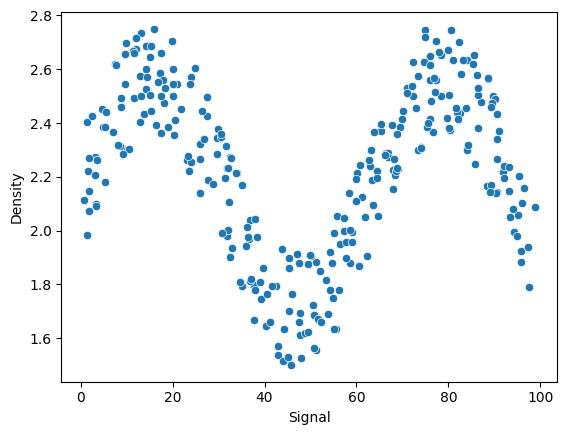

In [5]:
sns.scatterplot(df, x='Signal', y='Density')

In [10]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_preds = lr_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test,lr_preds)
mse = mean_squared_error(y_test,lr_preds)

In [18]:
mae

0.211198973318633

In [21]:
np.sqrt(mse)

0.2570051996584629

In [22]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [23]:
y_test.mean()

2.267044999300512

linear regression is not appropriate for this data

In [31]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(8,7),dpi=200)
    sns.scatterplot(df, x='Signal', y='Density', color='black')
    
    plt.plot(signal_range,output)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


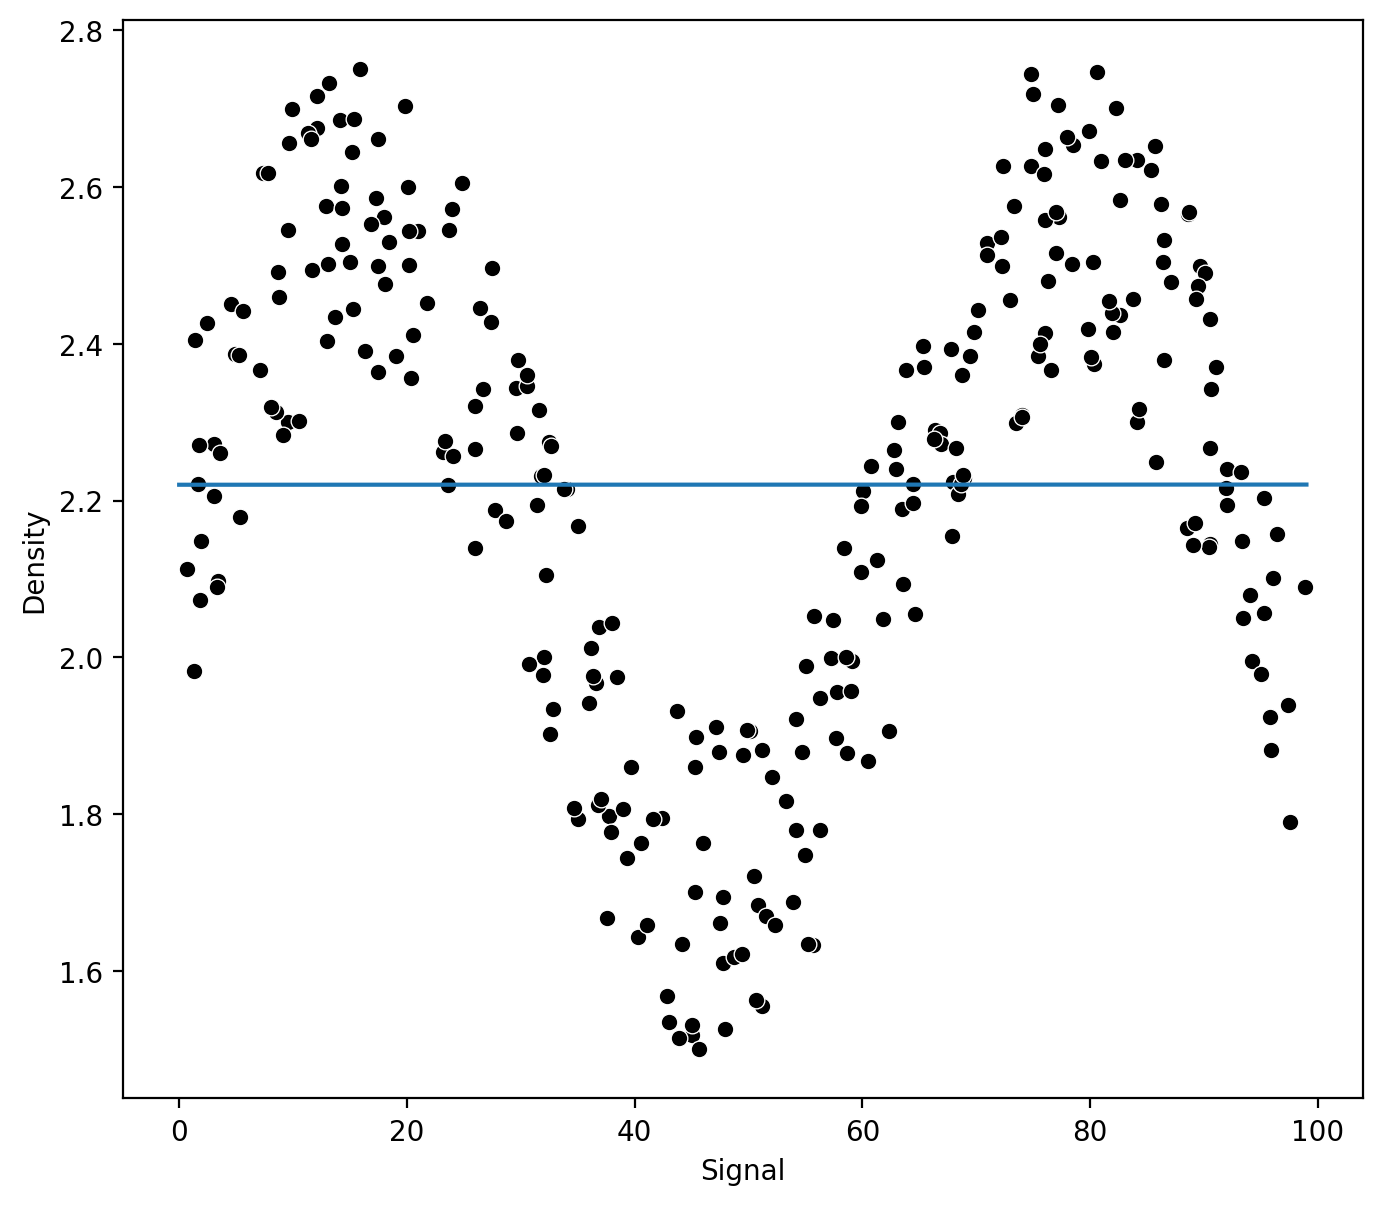

In [32]:
run_model(lr_model,X_train,y_train,X_test,y_test)

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())

MAE: 0.11864312011579757
RMSE: 0.14452813084167157


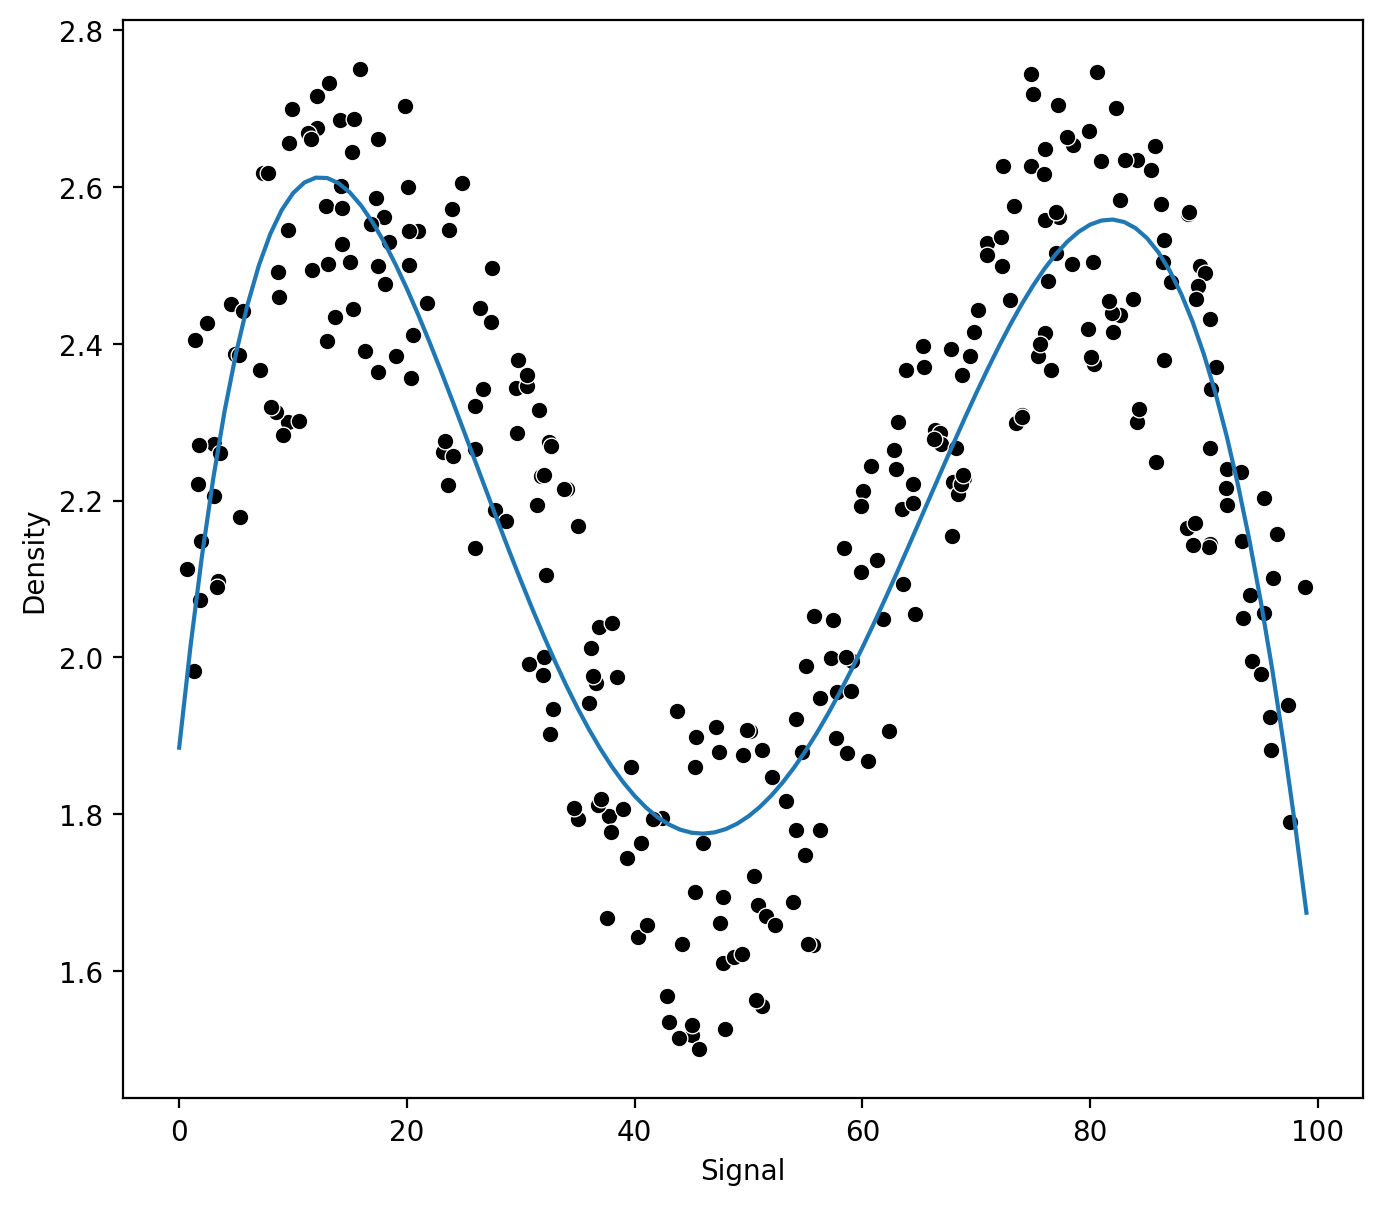

In [36]:
run_model(pipe,X_train,y_train,X_test,y_test)
#overfitting

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


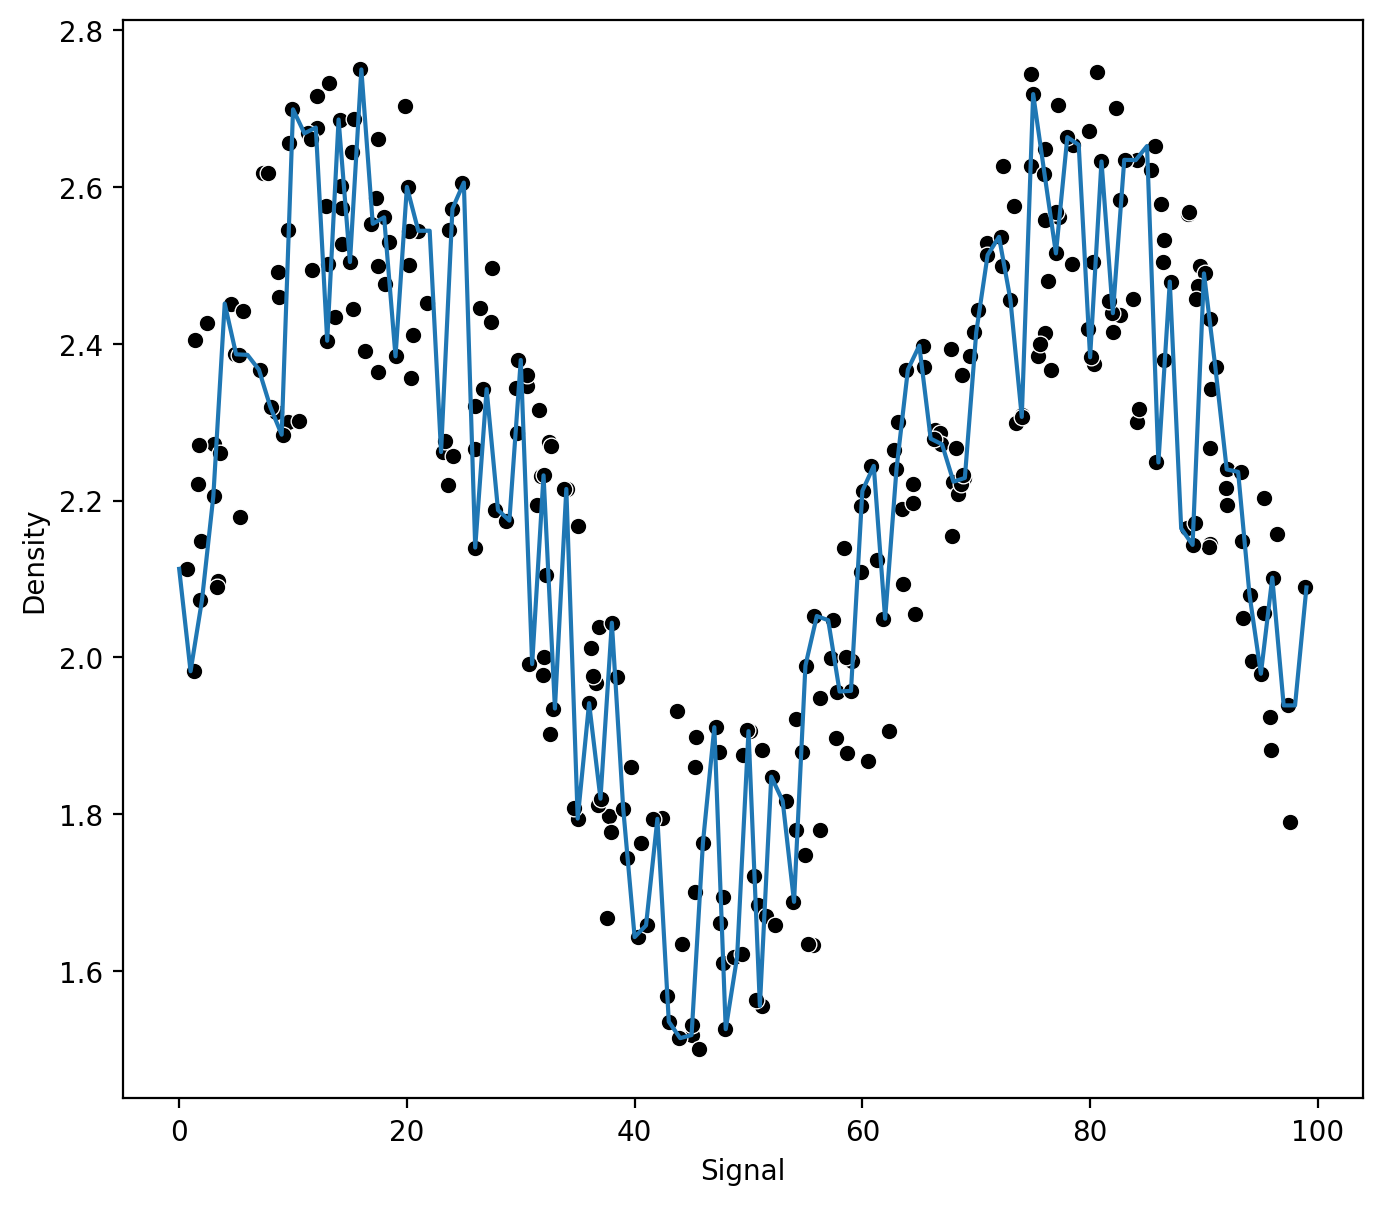

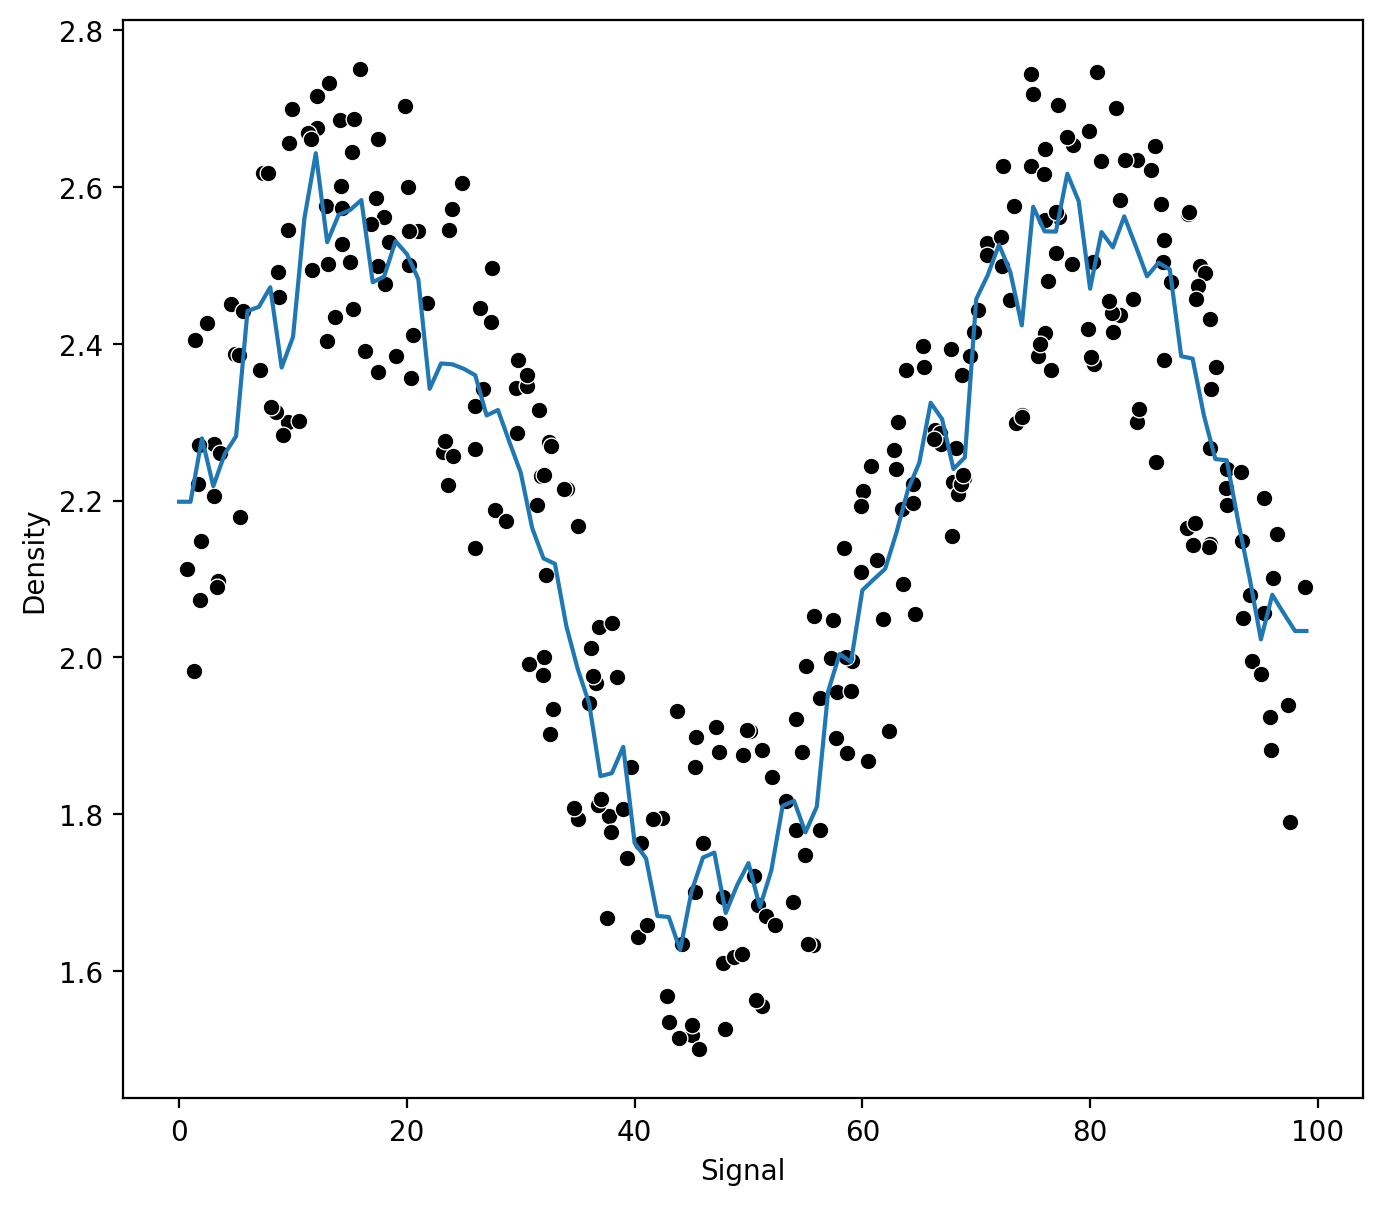

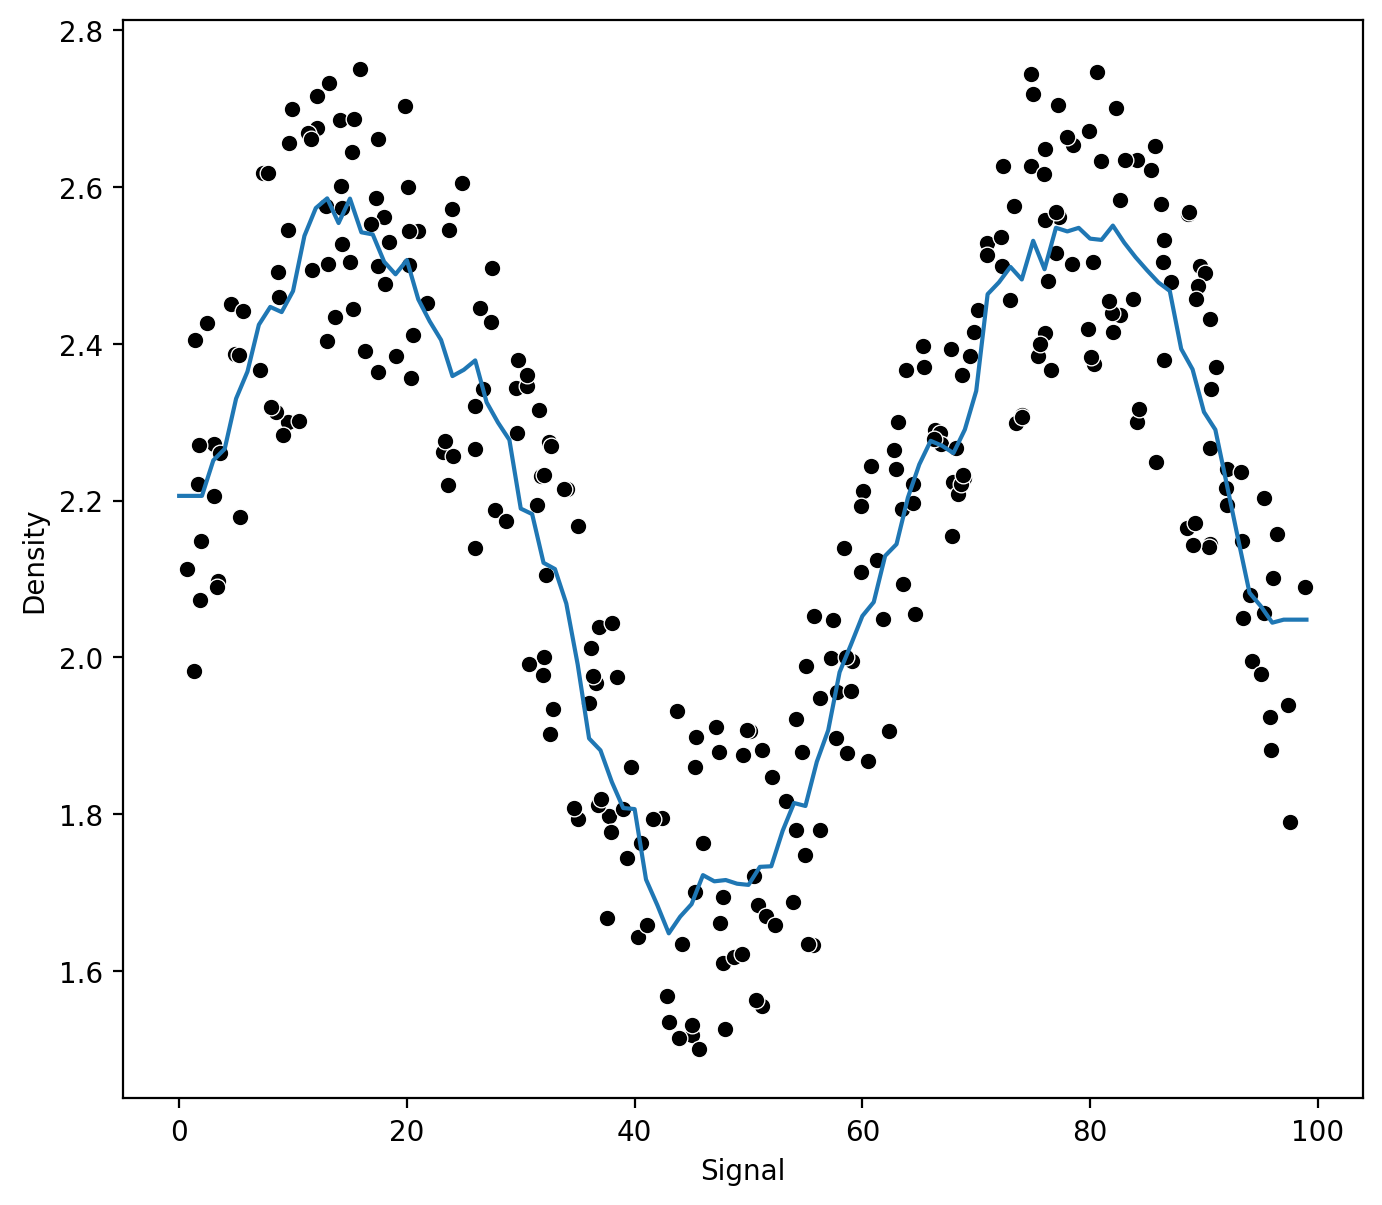

In [37]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)
    
#overfitting

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


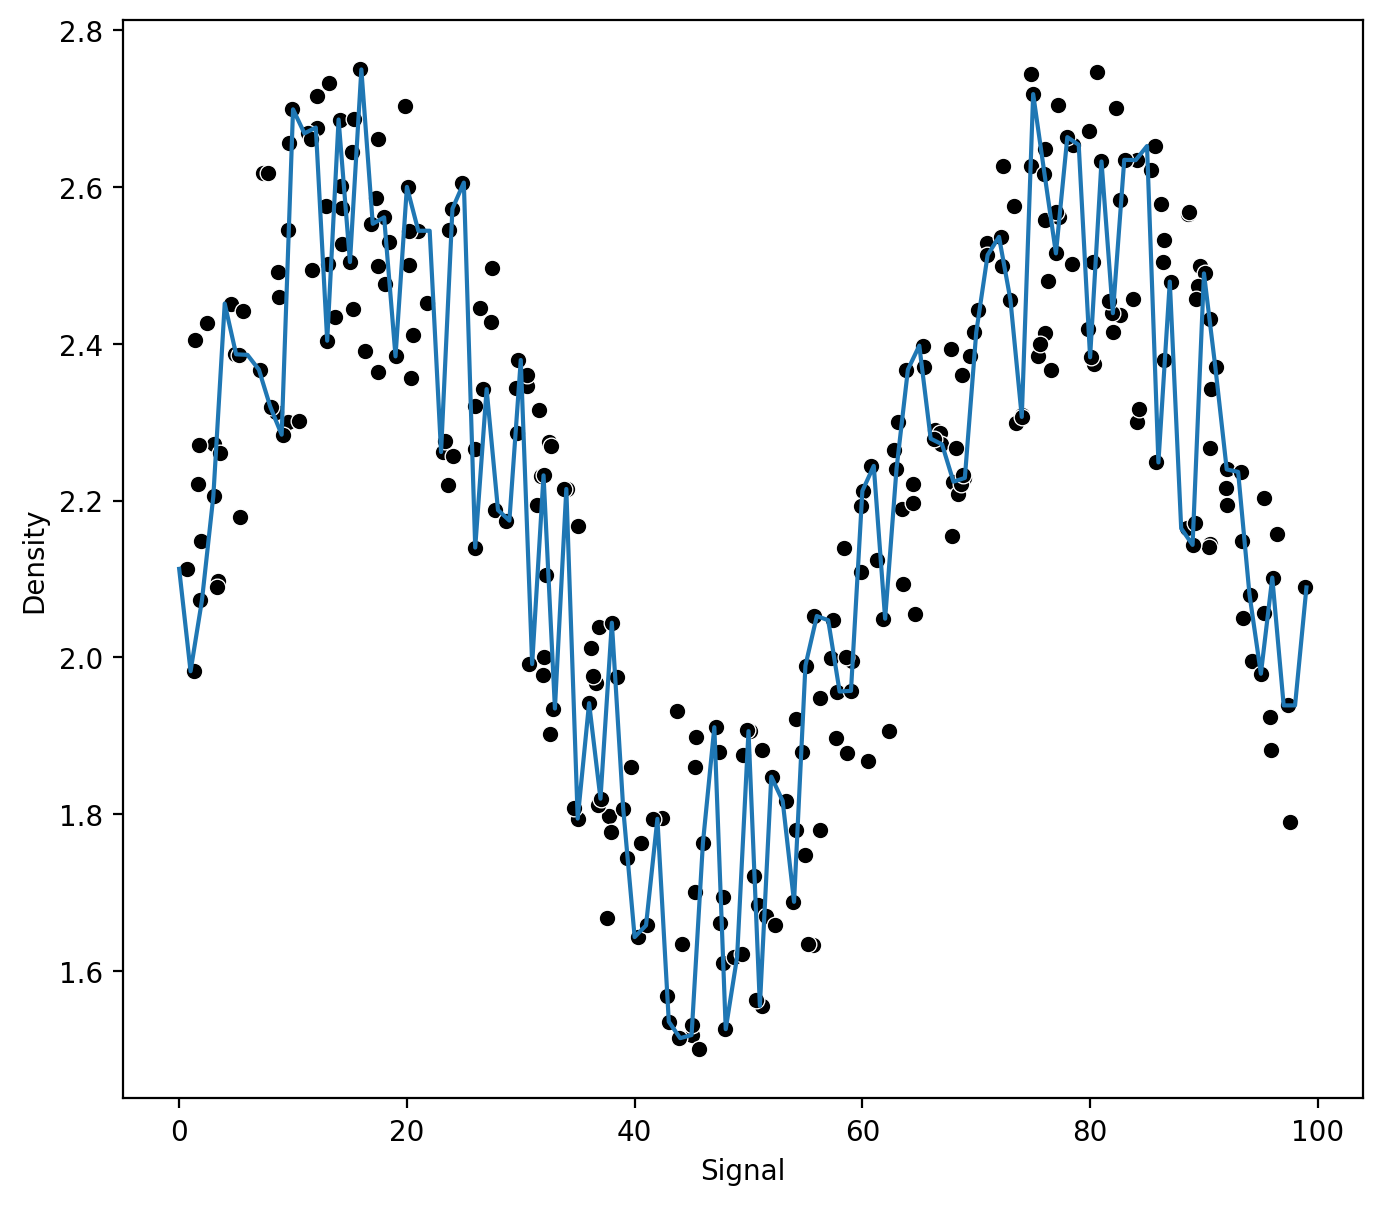

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

#overfitting

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


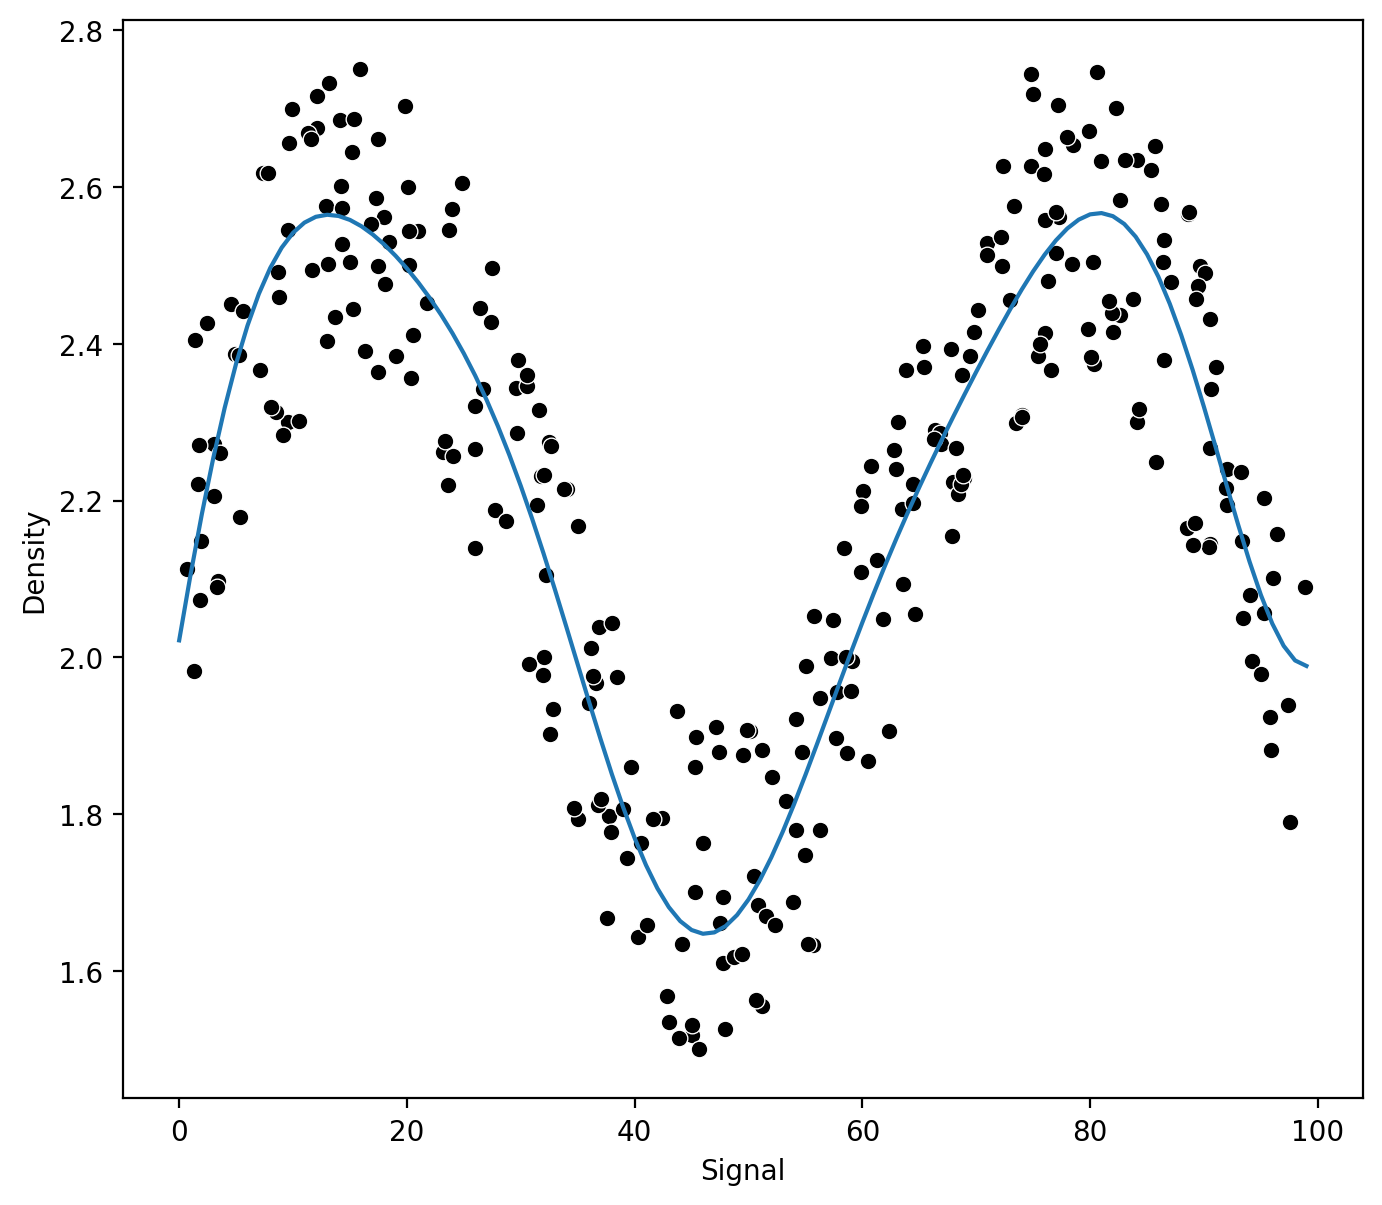

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

#overfitting

MAE: 0.11649293765423317
RMSE: 0.14125388511069037


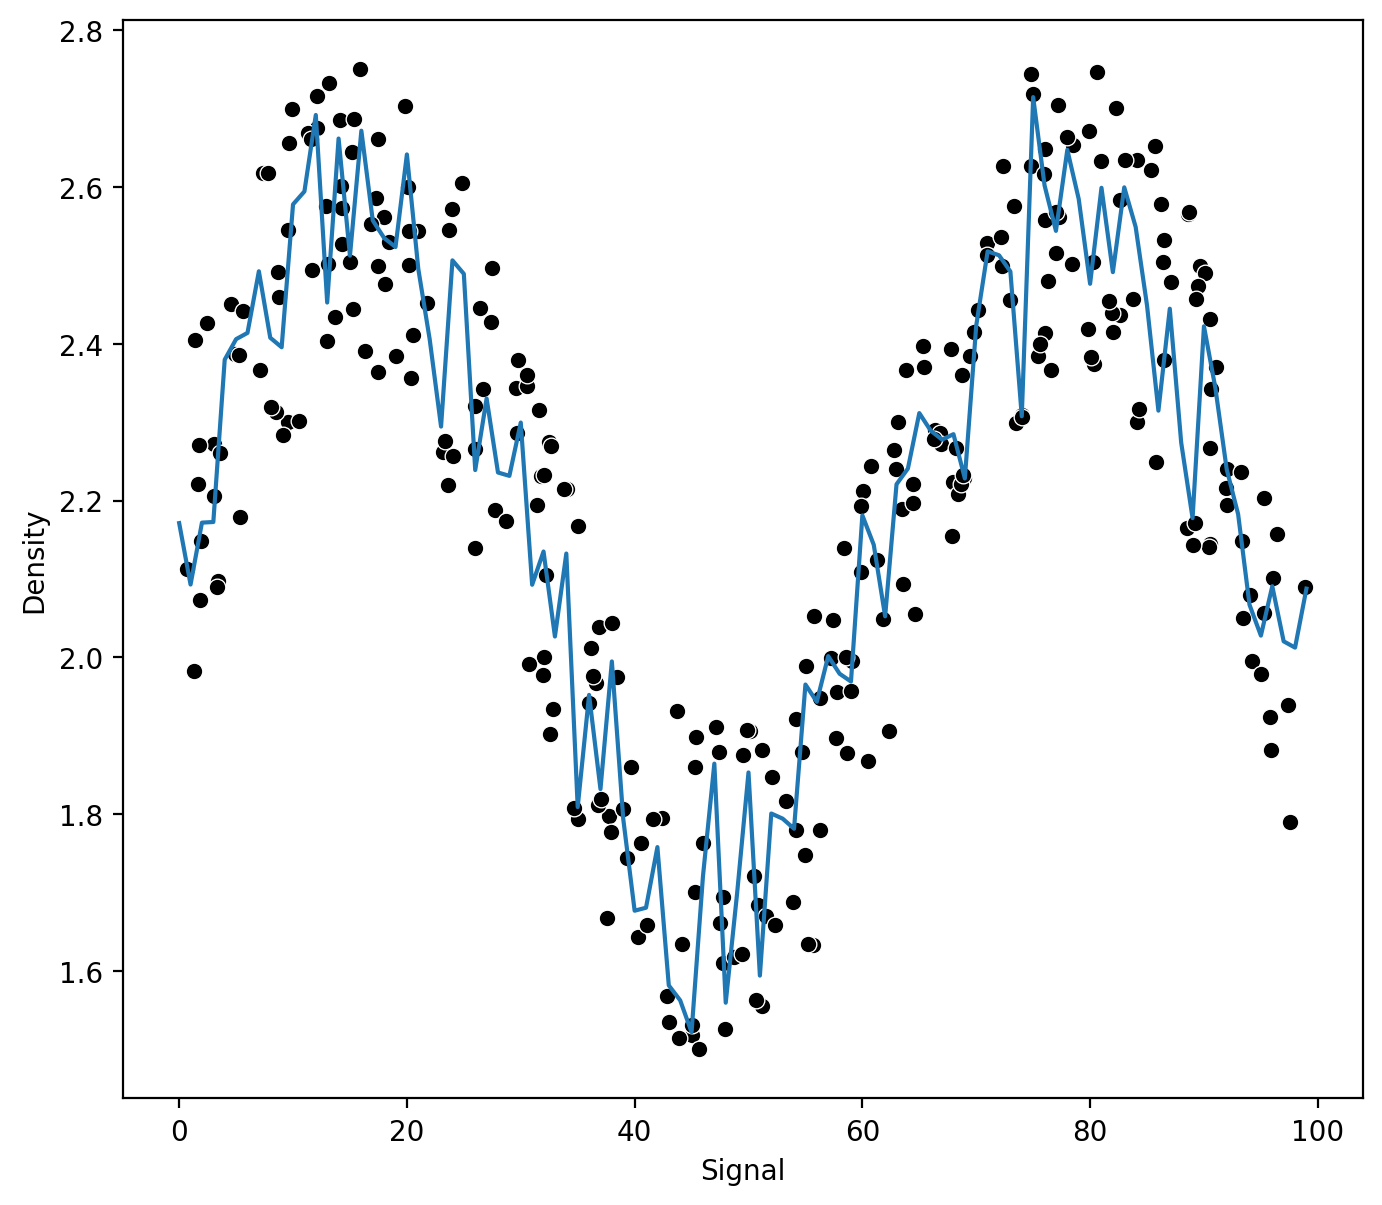

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr,X_train,y_train,X_test,y_test)